In [2]:
# Gere Comes the Fun Part.. For this Dataset I will use Linear Regression and Random Forest..
# Linear Regression :: This is a basic regression model suitable for continuous target variables. 
# Random Forest :: These models can capture non-linear relationships and interactions between features. 

,Unnamed: 0,Price,NumBedrooms,NumBathrooms,Floor_Space,Frontyard_space_in_ft,Bathroom_Level,Bedroom_Level,Primary_Bedroom_Level,Number_Parking_Spaces
0,0,1149000.0,5.0,5.0,2538.0,49.00,2,1,3,4.0
1,1,998900.0,3.0,4.0,2728.0,49.00,1,3,1,7.0
2,2,799900.0,3.0,3.0,1665.0,38.00,2,3,3,4.0
3,3,772888.0,3.0,4.0,1745.0,31.00,2,3,3,3.0
4,4,624900.0,3.0,2.0,1585.0,30.28,3,3,3,3.0


In [7]:
import pandas as pd

# Load the dataset
property_data = pd.read_csv('property_data_ready_for_model.csv')

# Display the first few rows of the dataset
property_data.head()

,Unnamed: 0,Price,NumBedrooms,NumBathrooms,Floor_Space,Frontyard_space_in_ft,Bathroom_Level,Bedroom_Level,Primary_Bedroom_Level,Number_Parking_Spaces
0,0,1149000.0,5.0,5.0,2538.0,49.00,2,1,3,4.0
1,1,998900.0,3.0,4.0,2728.0,49.00,1,3,1,7.0
2,2,799900.0,3.0,3.0,1665.0,38.00,2,3,3,4.0
3,3,772888.0,3.0,4.0,1745.0,31.00,2,3,3,3.0
4,4,624900.0,3.0,2.0,1585.0,30.28,3,3,3,3.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Drop the 'Unnamed: 0' column
property_data = property_data.drop(columns=['Unnamed: 0'])

# Split the data into training and testing sets (80% train, 20% test)
X = property_data.drop(columns=['Price'])
y = property_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics for both models
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

lr_metrics = (lr_mse, lr_mae, lr_r2)
rf_metrics = (rf_mse, rf_mae, rf_r2)

lr_metrics, rf_metrics

((59673739209.42886, 172703.35560925805, 0.594110227341432),
 (44709309053.92582, 132430.5473705272, 0.6958955224184737))

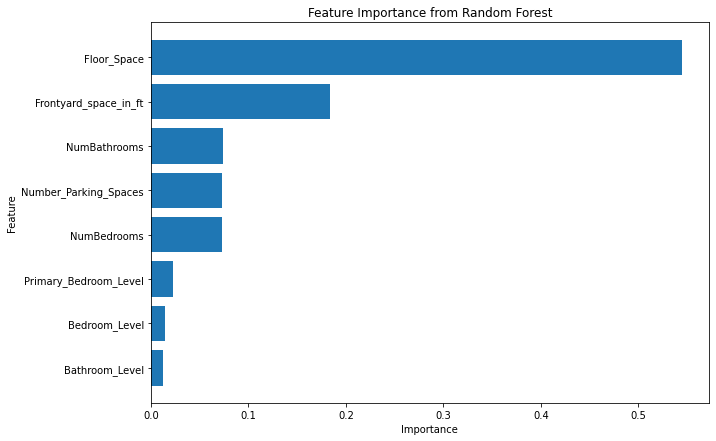

In [4]:
import matplotlib.pyplot as plt

# Feature importance from the Random Forest model
feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

# Plotting the feature importance
plt.figure(figsize=(10, 7))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

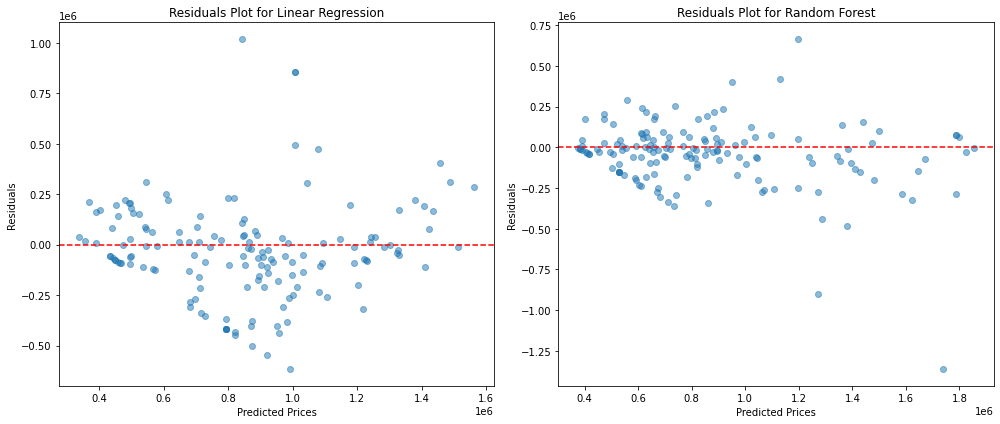

In [5]:
# Calculate residuals for both models
lr_residuals = y_test - lr_predictions
rf_residuals = y_test - rf_predictions

# Plot residuals
plt.figure(figsize=(14, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
plt.scatter(lr_predictions, lr_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Linear Regression')

# Random Forest Residuals
plt.subplot(1, 2, 2)
plt.scatter(rf_predictions, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Random Forest')

plt.tight_layout()
plt.show()

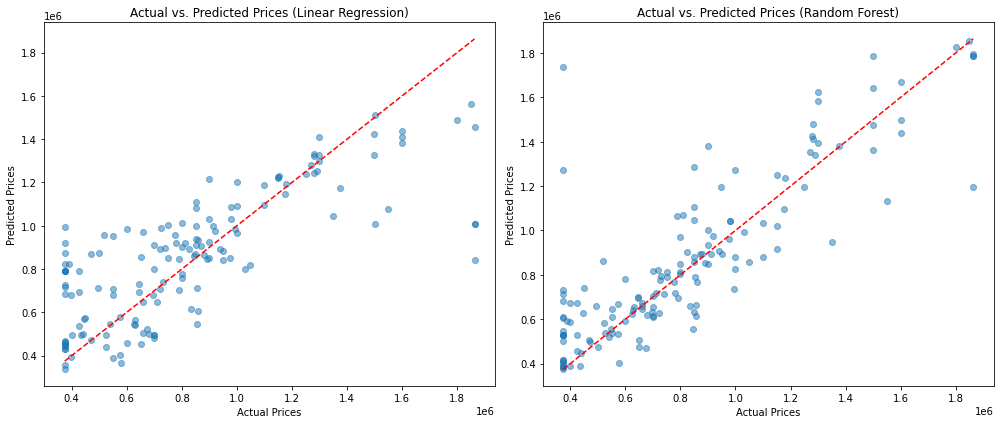

In [6]:
# Scatter plot of Actual vs. Predicted prices
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Linear Regression)')

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Random Forest)')

plt.tight_layout()
plt.show()